In [80]:
from landlab.io import read_esri_ascii
import landlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

## import original grid

In [81]:
(mg, z) = read_esri_ascii("./save_asc/testes/ascii_cropadotest.asc", name="topographic__elevation")
mg.at_node.keys()

['topographic__elevation']

## import another grid

In [82]:
(mg2, z2) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_100_topographic__elevation.asc", name="topographic__elevation")
mg2.at_node.keys()

['topographic__elevation']

In [83]:
mg2

RasterModelGrid((400, 400), xy_spacing=(10.0, 10.0), xy_of_lower_left=(0.0, 0.0))

## metodo que converte asc para matriz
 importa DEM diretamente da pasta, nao sendo necessario importar antes

In [84]:
def CountLinesAndColumns(fileName):        
    with open(fileName) as file:
        lines_after_6 = file.readlines()[5:]
   
    splitLine = lines_after_6[0].split()
    numberOfColumns = len(splitLine)        
    numberOfLines = lines_after_6.__len__()        
    grid = np.zeros((numberOfLines, numberOfColumns))    
    for i in range(numberOfLines):
        splitLine = lines_after_6[i].split()
        for j in range(numberOfColumns):
            grid[i][j] = splitLine[j]            
    file.close()                            
    return numberOfLines, numberOfColumns, grid

In [85]:
nl, nc, grid1 = CountLinesAndColumns("./save_asc/testes_fse_7_8/ascii_fse_100_topographic__elevation.asc")
print(nl)
print(nc)

400
400


In [86]:
nl, nc, grid2 = CountLinesAndColumns("./save_asc/testes/ascii_cropadotest.asc")
print(nl)
print(nc)

400
400


In [87]:
def plotdem(grid):
    plt.imshow(grid, interpolation = 'quadric', vmin = grid.min(), vmax = grid.max())
    plt.colorbar()
    plt.show()

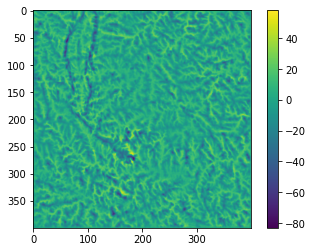

In [88]:
plotdem(grid1 - grid2)


## Cria a funçao substraction
faz a mesma coisa do metodo anterior porém usando o Landlab
>precisa das importaçoes no Landlab

>usar na ordem da primeira e posterior interaçao

In [91]:
def substraction(mg1,mg2):
    grid_g1 = mg1.at_node["topographic__elevation"].reshape(400,400)
    grid_g2 = mg2.at_node["topographic__elevation"].reshape(400,400)
    if 'substraction' in mg1.at_node.keys():
                mg1.delete_field("node","substraction")

    mg1.add_field("substraction", grid_g2 - grid_g1, at="node", copy=True, clobber=False)
    landlab.plot.imshow.imshow_grid_at_node(mg1,'substraction')        
    

### execuçao da funcao substraction

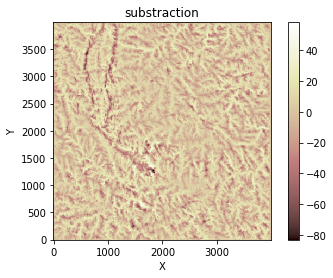

In [94]:
substraction (mg, mg2)

### grid original

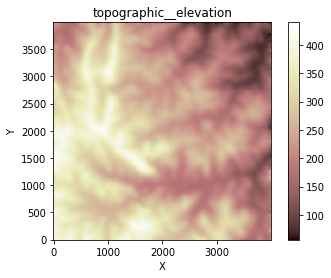

In [36]:
landlab.plot.imshow.imshow_grid_at_node(mg2,'topographic__elevation')

### apenas fast scape

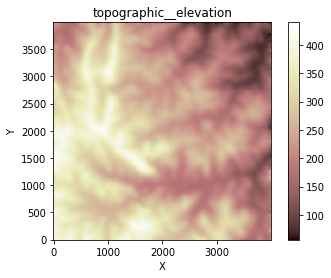

In [37]:
(mg1, z) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_100_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg1,'topographic__elevation')

### fast scape com modificaçao dos parametros

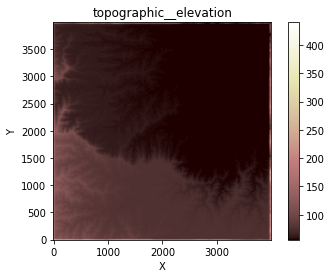

In [5]:
(mg, z) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_200_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

### apenas erosion deposition

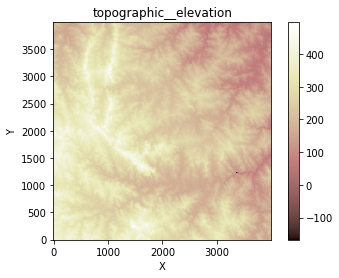

In [7]:
(mg, z) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

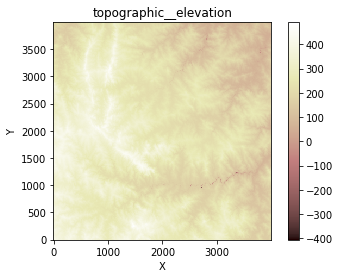

In [48]:
(mg, z) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_20_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

In [50]:
cc=mg.at_node['topographic__elevation']
cc[cc<0]

array([-248.95763948, -153.29460308, -232.43809843,  -72.32207253,
        -15.47729272,  -31.07806361,  -18.8165168 , -321.51862253,
       -215.27868722,  -66.18673336,  -21.16333081,   -5.33480863,
       -101.97696013,  -69.62656811, -171.07715941,  -25.78370779,
        -17.03929696,  -95.84863435,  -12.90984324,  -97.12626704,
        -47.11026758, -406.73876966, -168.16795518,  -44.07179699,
         -7.55516171,   -8.53281099,  -50.10059108,  -44.77532711,
        -11.46866675,  -22.47947213,  -22.70507271,  -22.92366786,
        -22.76606006,  -22.58165919])

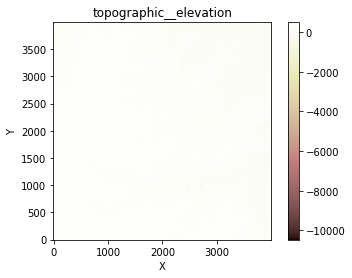

In [9]:
(mg, z) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_30_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

### depositando no já erodido 10 loops com dt de 1000

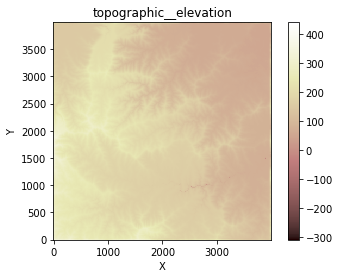

In [10]:
(mg, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

### agora 20 loops

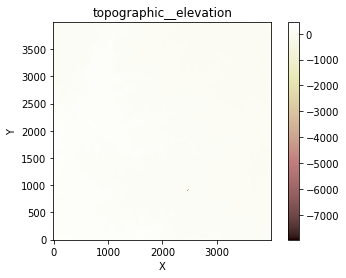

In [11]:
(mg, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_20_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

## intercalando fast scape com erod dep

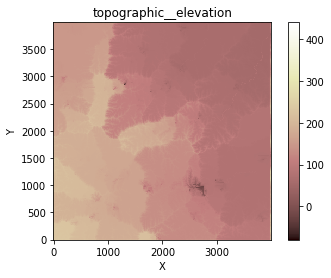

In [73]:
(mg10, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado10_topographic__elevation.asc", name="topographic__elevation")
mg10.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg10,'topographic__elevation')

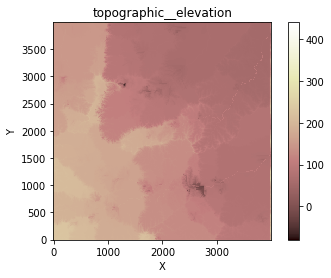

In [74]:
(mg20, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado20_topographic__elevation.asc", name="topographic__elevation")
mg20.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg20,'topographic__elevation')

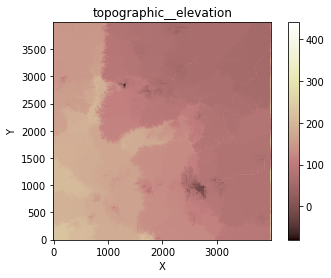

In [75]:
(mg30, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado30_topographic__elevation.asc", name="topographic__elevation")
mg30.at_node.keys()
landlab.plot.imshow.imshow_grid_at_node(mg30,'topographic__elevation')

## usar subtraçao pra verificar se há diferenças

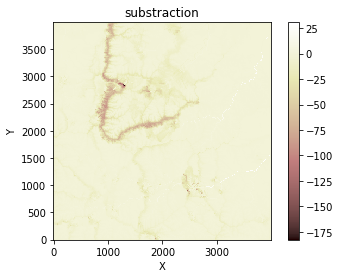

In [93]:
substraction(mg10, mg20) #chama a funçao da subtraçao

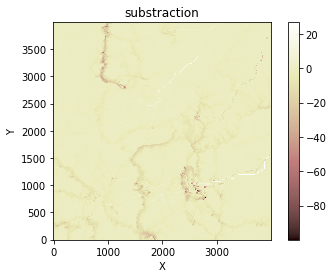

In [92]:
substraction(mg20, mg30)

In [96]:
(dem_crop, z) = read_esri_ascii("./save_asc/testes/ascii_cropadotest.asc", name="topographic__elevation")

(dem_fse_100, z) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_100_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_200, z) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_200_topographic__elevation.asc", name="topographic__elevation")

(dem_ed_10, z) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")
(dem_ed_20, z) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_20_topographic__elevation.asc", name="topographic__elevation")
(dem_ed_30, z) = read_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_30_topographic__elevation.asc", name="topographic__elevation")



(dem_fse_ed_10, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_ed_20, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_20_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_ed_30, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_30_topographic__elevation.asc", name="topographic__elevation")


(dem_fse_ed_10_inter, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado10_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_ed_20_inter, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado20_topographic__elevation.asc", name="topographic__elevation")
(dem_fse_ed_30_inter, z) = read_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado30_topographic__elevation.asc", name="topographic__elevation")


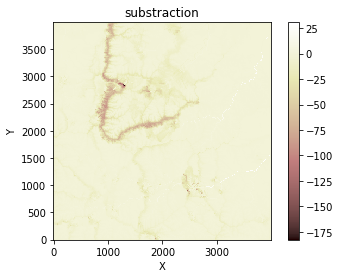

In [97]:
substraction(dem_fse_ed_10_inter, dem_fse_ed_20_inter)